In [1]:
from transformers import BertConfig, BertModel

config = BertConfig()
model = BertModel(config)

print(config)

/root/anaconda3/envs/llms/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.33.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [3]:
from transformers import BertTokenizer

tokenizer=BertTokenizer.from_pretrained('bert-base-cased')

'(MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /bert-base-cased/resolve/main/vocab.txt (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7f234df83790>, 'Connection to huggingface.co timed out. (connect timeout=10)'))"), '(Request ID: 85354477-9d59-4843-8e8c-550619fda259)')' thrown while requesting HEAD https://huggingface.co/bert-base-cased/resolve/main/vocab.txt
'(MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /bert-base-cased/resolve/main/added_tokens.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7f234df83d60>, 'Connection to huggingface.co timed out. (connect timeout=10)'))"), '(Request ID: 2eef5c8d-dda8-4948-a40a-ca7b2f5ed744)')' thrown while requesting HEAD https://huggingface.co/bert-base-cased/resolve/main/added_tokens.json
'(MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries e

OSError: Can't load tokenizer for 'bert-base-cased'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'bert-base-cased' is the correct path to a directory containing all relevant files for a BertTokenizer tokenizer.

In [21]:
import sys 
sys.path.append('/volume/nlp')
from Baichuan2_7B_base.tokenization_baichuan import BaichuanTokenizer

vocab_file='/volume/nlp/Baichuan2_7B_base/tokenizer.model'
tokenizer=BaichuanTokenizer(vocab_file)
tokenizer

BaichuanTokenizer(name_or_path='', vocab_size=125696, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True)}, clean_up_tokenization_spaces=False)

In [41]:
vocab=tokenizer.get_vocab()
type(vocab)

dict

In [53]:
import torch
a=torch.randint(0,10,(5,8))
b=torch.randint(0,10,(3,8))
print(a)
a[:,None,:].expand(5,3,8)


tensor([[4, 2, 4, 6, 0, 7, 6, 1],
        [0, 1, 4, 2, 1, 9, 4, 6],
        [2, 3, 9, 2, 3, 3, 8, 1],
        [2, 4, 3, 6, 1, 0, 7, 8],
        [5, 6, 5, 4, 6, 2, 2, 6]])


tensor([[[4, 2, 4, 6, 0, 7, 6, 1],
         [4, 2, 4, 6, 0, 7, 6, 1],
         [4, 2, 4, 6, 0, 7, 6, 1]],

        [[0, 1, 4, 2, 1, 9, 4, 6],
         [0, 1, 4, 2, 1, 9, 4, 6],
         [0, 1, 4, 2, 1, 9, 4, 6]],

        [[2, 3, 9, 2, 3, 3, 8, 1],
         [2, 3, 9, 2, 3, 3, 8, 1],
         [2, 3, 9, 2, 3, 3, 8, 1]],

        [[2, 4, 3, 6, 1, 0, 7, 8],
         [2, 4, 3, 6, 1, 0, 7, 8],
         [2, 4, 3, 6, 1, 0, 7, 8]],

        [[5, 6, 5, 4, 6, 2, 2, 6],
         [5, 6, 5, 4, 6, 2, 2, 6],
         [5, 6, 5, 4, 6, 2, 2, 6]]])

In [54]:
print(b)
b[None,:,:].expand(5,3,8)

tensor([[6, 0, 1, 0, 7, 7, 2, 7],
        [4, 5, 1, 1, 0, 5, 5, 9],
        [6, 1, 4, 3, 3, 5, 4, 9]])


tensor([[[6, 0, 1, 0, 7, 7, 2, 7],
         [4, 5, 1, 1, 0, 5, 5, 9],
         [6, 1, 4, 3, 3, 5, 4, 9]],

        [[6, 0, 1, 0, 7, 7, 2, 7],
         [4, 5, 1, 1, 0, 5, 5, 9],
         [6, 1, 4, 3, 3, 5, 4, 9]],

        [[6, 0, 1, 0, 7, 7, 2, 7],
         [4, 5, 1, 1, 0, 5, 5, 9],
         [6, 1, 4, 3, 3, 5, 4, 9]],

        [[6, 0, 1, 0, 7, 7, 2, 7],
         [4, 5, 1, 1, 0, 5, 5, 9],
         [6, 1, 4, 3, 3, 5, 4, 9]],

        [[6, 0, 1, 0, 7, 7, 2, 7],
         [4, 5, 1, 1, 0, 5, 5, 9],
         [6, 1, 4, 3, 3, 5, 4, 9]]])

In [55]:
import torch
a=torch.ones(2,2)
n=torch.tensor([2,1])
a*n

tensor([[2., 1.],
        [2., 1.]])

In [26]:
import sentencepiece as spm
sp_tokenizer=spm.SentencePieceProcessor(model_file=vocab_file)
sp_tokenizer

<sentencepiece.SentencePieceProcessor; proxy of <Swig Object of type 'sentencepiece::SentencePieceProcessor *' at 0x7f233a853330> >

In [39]:
sp_tokenizer.IsByte(2)

False

In [30]:
inputs='弘成教育成立于2008年'
tokens=sp_tokenizer.Encode(inputs,out_type=str)
tokens

['弘', '成', '教育', '成立于', '2', '0', '0', '8', '年']

In [17]:
inputs='弘成教育成立于2008年'
tokens=tokenizer.tokenize(inputs)
tokens

['弘', '成', '教育', '成立于', '2', '0', '0', '8', '年']

In [18]:
tokenizer.__dict__

{'sp_model_kwargs': {},
 'init_inputs': (),
 'init_kwargs': {'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True),
  'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True),
  'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True),
  'pad_token': None,
  'add_bos_token': True,
  'add_eos_token': False,
  'sp_model_kwargs': {},
  'clean_up_tokenization_spaces': False},
 'name_or_path': '',
 '_processor_class': None,
 'model_max_length': 1000000000000000019884624838656,
 'padding_side': 'right',
 'truncation_side': 'right',
 'model_input_names': ['input_ids', 'attention_mask'],
 'clean_up_tokenization_spaces': False,
 'split_special_tokens': False,
 'deprecation_warnings': {},
 '_in_target_context_manager': False,
 '_bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True),
 '_eos_token': AddedToken("</s>", rstrip=False, lstrip=F

In [19]:
dir(tokenizer)

['SPECIAL_TOKENS_ATTRIBUTES',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_tokens',
 '_additional_special_tokens',
 '_auto_class',
 '_batch_encode_plus',
 '_batch_prepare_for_model',
 '_bos_token',
 '_call_one',
 '_cls_token',
 '_convert_id_to_token',
 '_convert_token_to_id',
 '_convert_token_to_id_with_added_voc',
 '_create_repo',
 '_create_trie',
 '_decode',
 '_decode_use_source_tokenizer',
 '_encode_plus',
 '_eos_token',
 '_eventual_warn_about_too_long_sequence',
 '_eventually_correct_t5_max_length',
 '_from_pretrained',
 '_get_files_timestamps',
 '_get_padding_truncation_strateg

In [20]:
tokenizer.back

True

In [6]:
import torch
a=torch.arange(0,4)
b=torch.tensor([2,3])
res=torch.outer(a,b)
torch.cat((res,res),dim=-1)

tensor([[0, 0, 0, 0],
        [2, 3, 2, 3],
        [4, 6, 4, 6],
        [6, 9, 6, 9]])

In [4]:
import torch
#1*2*9
a=torch.tensor([[[1,1,1,2,2,2,3,3,3],[4,4,4,5,5,5,6,6,6]]])
a

tensor([[[1, 1, 1, 2, 2, 2, 3, 3, 3],
         [4, 4, 4, 5, 5, 5, 6, 6, 6]]])

In [10]:
a.unflatten(-1,(3,3)).unsqueeze(0).transpose(0,-2).squeeze(-2)

tensor([[[[1, 1, 1],
          [4, 4, 4]]],


        [[[2, 2, 2],
          [5, 5, 5]]],


        [[[3, 3, 3],
          [6, 6, 6]]]])

In [11]:
import torch
arr=torch.arange(24).reshape(2,3,4)
arr

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [12]:
arr.transpose(0,1)

tensor([[[ 0,  1,  2,  3],
         [12, 13, 14, 15]],

        [[ 4,  5,  6,  7],
         [16, 17, 18, 19]],

        [[ 8,  9, 10, 11],
         [20, 21, 22, 23]]])

In [13]:
arr.transpose(0,2)
#手算 4*3*2
[[[0,12],
  [4,16],
  [8,20]],
 [[1,13],
  [5,17],
  [9,21]],
 [[2,14],
  [6,18],
  [10,22]],
 [[3,15],
  [7,19],
  [11,23]],
 ]

[[[0, 12], [4, 16], [8, 20]],
 [[1, 13], [5, 17], [9, 21]],
 [[2, 14], [6, 18], [10, 22]],
 [[3, 15], [7, 19], [11, 23]]]

In [14]:
arr.transpose(1,2)
#手算 2*4*3
[[[0,4,8],
  [1,5,9],
  [2,6,10],
  [3,7,11]],
 [[12,16,20],
  [13,17,21],
  [14,18,22],
  [15,19,23]],
 ]

[[[0, 4, 8], [1, 5, 9], [2, 6, 10], [3, 7, 11]],
 [[12, 16, 20], [13, 17, 21], [14, 18, 22], [15, 19, 23]]]

In [20]:
#五维度 1*2*4*3*5 1*bs*seq_len*3*hidden_size
brr=torch.arange(60).reshape(1,2,2,3,5)
brr
#直观理解这个矩阵：每一个二维矩阵中表示输入序列的一个词的q,k,v向量，每两个矩阵组成一个bs中的序列
#目的是将q，k，v单独抽取出来，即一个bs中原来是2*3*5
# [
# [[q11,q12,q13,q14,q15],[k11,k12,k13,k14,k15],[v11,v12,v13,v14,v15]],
# [[q21,q22,q23,q24,q25],[k21,k22,k23,k24,k25],[v21,v22,v23,v24,v25]]
# ]
#要变成3*2*5
# [
# [[q11,q12,q13,q14,q15],[q21,q22,q23,q24,q25]],
# [[k11,k12,k13,k14,k15],[k21,k22,k23,k24,k25]],
# [[v11,v12,v13,v14,v15],[v21,v22,v23,v24,v25]]
# ]

#根据之前的理论，旋转时不变的轴，那么其轴上对应值得顺序就不会发生变化，我们
#的目的是将q,k,v分开来，所以显然应该将-2轴旋转到最前面，但是又不能改变bs轴
#上的顺序，所以需要添加一个0轴，然后将-2轴旋转到最前面，然后将新的-2轴去掉

#试试手算转置下面的五维矩阵的0，-2轴
#3*2*2*1*5
#旧-2轴上的序列很好确定，但是旧0轴只有一个值
#所以新的-2轴应该只有一个元素，新的0轴有3个元素
#要想更加人性化的写出结果，就需要确定每个元素的位置，所以应当按照从内到外的顺序来写
#注意：计算过程中为了利于观察，省略外层的一对括号，用间隔来代替
#首先可以确定-1和0轴，-1轴的顺序不变，那么最里面的向量一定保持整体变动
#其次是0轴，所以可以写出基本框架（后面的过程可以看做将0轴上每个元素补充完整）
#[0,1,2,3,4]，

#[5,6,7,8,9]，

#[10,11,12,13,14]
#这三组分别是0轴上的开头元素，但不完整
#接着新的-2轴是原来的0轴，由于原来0轴只有一个元素
#则新的-2轴就是每个加个括号，即
#[[0,1,2,3,4]]，

#[[5,6,7,8,9]]，

#[[10,11,12,13,14]]
#然后-3轴，不变，原来的顺序是0-15,5-20,10-25，所以可以写出
# [[[0,1,2,3,4]]
# [[15,16,17,18,19]]],

#[[[5,6,7,8,9]],
#[[20,21,22,23,24]]],

#[[[10,11,12,13,14]],
#[[25,26,27,28,29]]],
#接下来是1轴，不变，原来的顺序是0-30,5-35,10-40;15-45,20-50,25-55,所以可以写出
# [[[0,1,2,3,4]]
# [[15,16,17,18,19]]],

# [[[30,31,32,33,34]]
# [[45,46,47,48,49]]],
########这个算一块########
#[[[5,6,7,8,9]],
#[[20,21,22,23,24]]],

# [[[35,36,37,38,39]]
# [[50,51,52,53,54]]],
########这个算一块########
#[[[10,11,12,13,14]]
# [[25,26,27,28,29]]],

# [[[40,41,42,43,44]]
# [[55,56,57,58,59]]]
########这个算一块########
#最后0轴，最开始确定的框架就是0轴，所以加一个最外层的括号和间隔代表的括号就行了
#结果应该是(注意区分单行空格和双行空格)
#[
# [
# [[[0,1,2,3,4]]
# [[15,16,17,18,19]]],

# [[[30,31,32,33,34]]
# [[45,46,47,48,49]]]
# ],


# [
#[[[5,6,7,8,9]],
#[[20,21,22,23,24]]],

# [[[35,36,37,38,39]]
# [[50,51,52,53,54]]],
# ],


# [
#[[[10,11,12,13,14]]
# [[25,26,27,28,29]]],

# [[[40,41,42,43,44]]
# [[55,56,57,58,59]]]
# ],
# ]


tensor([[[[[ 0,  1,  2,  3,  4],
           [ 5,  6,  7,  8,  9],
           [10, 11, 12, 13, 14]],

          [[15, 16, 17, 18, 19],
           [20, 21, 22, 23, 24],
           [25, 26, 27, 28, 29]]],


         [[[30, 31, 32, 33, 34],
           [35, 36, 37, 38, 39],
           [40, 41, 42, 43, 44]],

          [[45, 46, 47, 48, 49],
           [50, 51, 52, 53, 54],
           [55, 56, 57, 58, 59]]]]])

In [21]:
#验证
brr.transpose(0,-2)

tensor([[[[[ 0,  1,  2,  3,  4]],

          [[15, 16, 17, 18, 19]]],


         [[[30, 31, 32, 33, 34]],

          [[45, 46, 47, 48, 49]]]],



        [[[[ 5,  6,  7,  8,  9]],

          [[20, 21, 22, 23, 24]]],


         [[[35, 36, 37, 38, 39]],

          [[50, 51, 52, 53, 54]]]],



        [[[[10, 11, 12, 13, 14]],

          [[25, 26, 27, 28, 29]]],


         [[[40, 41, 42, 43, 44]],

          [[55, 56, 57, 58, 59]]]]])

In [ ]:
#总结：这是一种从介于几何和代数之间的一种理解方式，如果只用几何，在处理高维度的时候几乎无法使用
#如果只用代数，适合编写代码，但是理解起来还是比较抽象（https://blog.csdn.net/qq_38290604/article/details/105390250）
#本文从交换轴的角度来理解，交换轴的时候，不变的轴上的顺序是不变的，变动的轴上的顺序是变动的，可以较好的理解。
#这种方式能够为了实现我们想要达到的目的，可以推算出应该如何交换轴，而不是从结果来理解为什么这样交换。
#比如这里想要将q，k，v分开，为什么要先添加一个0轴，再交换-2轴和0轴(分开qkv，所以要将-2轴拿到最前，但是又不能破坏bs上的顺序，则加一个0维）。
#另外，理解上述过程之后从实际意义上来理解结果，比如一开始是1*bs*seq_len*3*hidden_size
#得到的结果是3*bs*seq_len*1*hidden_size
#即我们有q,k,v三个4维张量,每个张量的第一维是bs，第二维是seq_len，第三维和第四维一起是[hidden_size]，
#所以可以得到q就是(下标三个值分别表示bs,seq_len,hidden_size)
#[[[q111,q112,q113,q114,q115],[q121,q122,q123,q124,q125]]],
#[[[q211,q212,q213,q214,q215],[q221,q222,q223,q224,q225]]],
#对应上面的例子就是
#[[[[ 0,  1,  2,  3,  4]],[[15, 16, 17, 18, 19]]],
# [[[30, 31, 32, 33, 34]],[[45, 46, 47, 48, 49]]]]
#k,v同理

In [5]:
import cv2
import numpy as np
def Contrast(img):
    # 图像方差
    std = np.sqrt(np.var(img))
    if std <= 3:
        p = 3.0
    elif std <= 10:
        p = (27 - 2 * std) / 7
    else:
        p = 1.0

    In = img / 255.0
    G = cv2.GaussianBlur(img, (5, 5), 0)  

    E = np.power(((G + 0.1) / (img + 0.1)), p)
    S = np.power(In, E)

    dst = np.uint8(S * 255.0)
    return dst

(1224, 1698, 3)


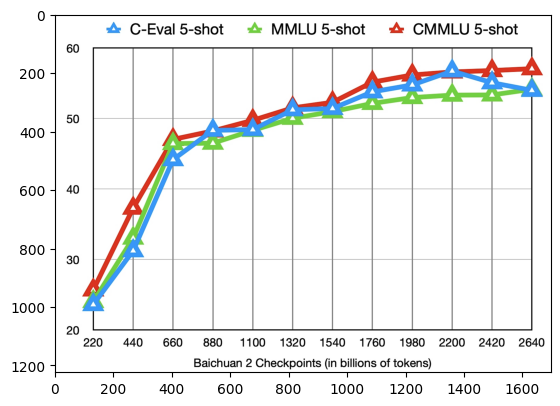

In [6]:
"""PIL读取图片"""
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
path='/volume/nlp/Baichuan2_7B_base/checkpoints.jpeg'
img=Image.open(path)
img=np.array(img)
print(img.shape)
plt.imshow(Contrast(img))
plt.show()

(1224, 1698, 3)


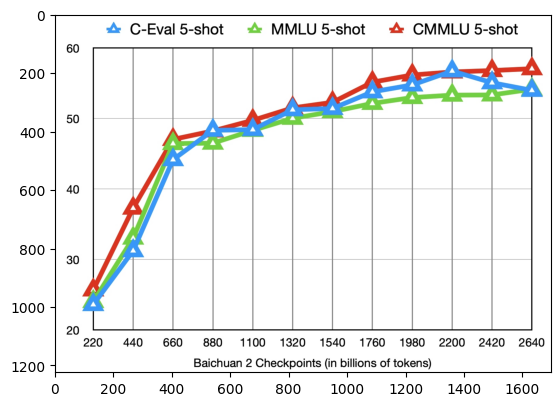

In [7]:
import cv2
img=cv2.imread(path)
print(img.shape)
plt.imshow(img[...,::-1])
plt.show()